# ***Importing Libraries***

In [1]:
import pandas as pd #for dataframes
import seaborn as sns #for more complicated plots
import matplotlib.pyplot as plt # for simple plots
%matplotlib inline # plots in notebook under respective code
import ast #abstract syntax

ModuleNotFoundError: No module named 'seaborn'

# ***Data Cleaning and EDA***

In [ ]:
# CSV to DF
df = pd.read_csv("C:/Users\kirst\OneDrive\Desktop\)\Semester 2 Courses\COMP 6940 Big Data and Visual Analytics/top_hollywood_grossing_movies.csv")

In [ ]:
df.describe()  #gives us some statistical decription of the data

,Unnamed: 0,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,900.000000,9.000000e+02,9.000000e+02,9.000000e+02
mean,449.500000,1.694776e+08,2.332383e+08,4.017626e+08
std,259.951919,1.043421e+08,2.185393e+08,3.092720e+08
min,0.000000,8.190346e+07,2.600000e+02,8.260470e+07
25%,224.750000,1.025566e+08,9.222500e+07,2.033883e+08
50%,449.500000,1.338492e+08,1.670817e+08,3.070346e+08
75%,674.250000,1.942324e+08,2.896735e+08,4.827288e+08
max,899.000000,9.366622e+08,2.086739e+09,2.847246e+09


In [ ]:
df.info() #gives a summary of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  900 non-null    int64 
 1   Title                       900 non-null    object
 2   Movie Info                  900 non-null    object
 3   Distributor                 900 non-null    object
 4   Release Date                698 non-null    object
 5   Domestic Sales (in $)       900 non-null    int64 
 6   International Sales (in $)  900 non-null    int64 
 7   World Sales (in $)          900 non-null    int64 
 8   Genre                       900 non-null    object
 9   Movie Runtime               900 non-null    object
 10  License                     729 non-null    object
dtypes: int64(4), object(7)
memory usage: 77.5+ KB


In [ ]:
df.dtypes # checking the data types

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [ ]:
df.head()  # shows us what the first 5 rows of the df look like

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,cluster
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,Action|Adventure|Sci-Fi,2 hr 18 min,PG-13,3
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,Action|Adventure|Drama|Sci-Fi,3 hr 1 min,PG-13,3
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,Action|Adventure|Fantasy|Sci-Fi,2 hr 42 min,PG-13,3
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,Action|Adventure|Sci-Fi,2 hr 14 min,NaN,3
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,Action|Adventure|Sci-Fi,2 hr 29 min,NaN,3


In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns    #tells us which cols have numeric info
print(numeric_cols)

Index(['Unnamed: 0', 'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)'],
      dtype='object')


In [ ]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns    #tells us which cols have non-numeric info
print(non_numeric_cols)

Index(['Title', 'Movie Info', 'Distributor', 'Release Date', 'Genre',
       'Movie Runtime', 'License'],
      dtype='object')


### Observing Missing Data

In [ ]:
df[non_numeric_cols].info()  # gives us the non-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          900 non-null    object
 1   Movie Info     900 non-null    object
 2   Distributor    900 non-null    object
 3   Release Date   698 non-null    object
 4   Genre          900 non-null    object
 5   Movie Runtime  900 non-null    object
 6   License        729 non-null    object
dtypes: object(7)
memory usage: 49.3+ KB


In [ ]:
#columns and their num of missing values
num_missing = df.isna().sum()
num_missing[:11]

Unnamed: 0                      0
Title                           0
Movie Info                      0
Distributor                     0
Release Date                  202
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       171
dtype: int64

In [ ]:
# % of missing values by col
pct_missing = df.isna().mean()*100
pct_missing[:11]

Unnamed: 0                     0.000000
Title                          0.000000
Movie Info                     0.000000
Distributor                    0.000000
Release Date                  22.444444
Domestic Sales (in $)          0.000000
International Sales (in $)     0.000000
World Sales (in $)             0.000000
Genre                          0.000000
Movie Runtime                  0.000000
License                       19.000000
dtype: float64

In [ ]:
# heatmap to visualse missing data
plt.figure(figsize=(10,8))

cols = df.columns[:11]
colours = ['#000099', '#ffff00'] # yellow - missing data, blue - not missing
sns.heatmap(df[cols].isna(), cmap=sns.color_palette(colours))

# Imputation and Manipulation of Data

As seen in the previous section, Release Date is missing 22.44% and License is missing 19% of it's data
I decided to fill the missing release date rows with NaN and missing License with NA instead of deleting so that the rest of the row wouldn't be lost from the analysis
(In this situation it would be illogical to use mean or most frequent values)

In [ ]:
# impute missing data w constant values
df_copy = df.copy()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna('NaN')
df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna('NaN')
df_copy.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [ ]:
# here we see that all rows are filled
df_copy[non_numeric_cols].info()
df_copy[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          900 non-null    object
 1   Movie Info     900 non-null    object
 2   Distributor    900 non-null    object
 3   Release Date   900 non-null    object
 4   Genre          900 non-null    object
 5   Movie Runtime  900 non-null    object
 6   License        900 non-null    object
dtypes: object(7)
memory usage: 49.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Unnamed: 0                  900 non-null    int64
 1   Domestic Sales (in $)       900 non-null    int64
 2   International Sales (in $)  900 non-null    int64
 3   World Sales (in $)          900 non-null    int64
dtypes: int64(4)
memory usage: 28.

### Converting Runtime to minutes

Runtime is converted to minutes as it is more uniform and easier to perform analysis such as sorting, grouping, filtering etc.

In [ ]:
def convert_to_minutes(s):
    if isinstance(s,str):
        parts= s.split(' ')
        if len(parts)==4 and parts[1].endswith('hr') and parts[3].endswith('min'):
            hours= int(parts[0])
            minutes= int(parts[2])
            return hours*60 + minutes
    return None

In [ ]:
# applying this to the copy df
df_copy['Runtime in Mins']=df_copy['Movie Runtime'].apply(convert_to_minutes)
df_copy.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Runtime in Mins
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,138.0
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,181.0
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,162.0
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,134.0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,149.0


### Release date converting to datetime

Converting date to datetime (numerical) allows for sorting, filtering , grouping and other functions

In [ ]:
# converting date time
# first print to see data type : it's object
df['Release Date']

0      December 16, 2015
1         April 24, 2019
2      December 16, 2009
3                    NaN
4                    NaN
             ...        
895    November 14, 2007
896                  NaN
897     February 9, 2006
898         June 2, 2016
899    December 22, 2017
Name: Release Date, Length: 900, dtype: object

In [ ]:
# changing type
# I decided to delete rows bc it was unable to convert to datetime format
df_copy['Release Date']=pd.to_datetime(df_copy['Release Date'])
df_copy

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Runtime in Mins
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,138.0
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,181.0
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,162.0
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,134.0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,Beowulf (2007),The warrior Beowulf must fight and defeat the ...,Paramount Pictures,2007-11-14,82280579,114113166,196393745,"['Action', 'Adventure', 'Animation', 'Fantasy']",1 hr 55 min,PG-13,115.0
896,896,Bridge to Terabithia (2007),A preteen's life turns upside down when he bef...,Walt Disney Studios Motion Pictures,NaT,82272442,55314621,137587063,"['Drama', 'Family', 'Fantasy']",1 hr 36 min,NaN,96.0
897,897,The Pink Panther (2006),Bumbling Inspector Clouseau must solve the mur...,Sony Pictures Entertainment (SPE),2006-02-09,82226474,81889423,164115897,"['Adventure', 'Comedy', 'Crime', 'Mystery']",1 hr 33 min,PG,93.0
898,898,Teenage Mutant Ninja Turtles: Out of the Shado...,The Turtles get into another battle with their...,Paramount Pictures,2016-06-02,82051601,163572247,245623848,"['Action', 'Adventure', 'Comedy', 'Sci-Fi']",1 hr 52 min,PG-13,112.0


#  Numerical Encoding of License

Numerical encoding of license helps standardize the data. It also reduces the size of the dataset, speeding up processing time.

In [ ]:
df_copy['License'].nunique()  #Showing the number of unique values for license

5

In [ ]:
df_copy['License'].unique()  #listing what those values are

array(['PG-13', 'NaN', 'PG', 'G', 'R'], dtype=object)

In [ ]:
License_Encoded = {'NaN':0, 'G':1, 'PG':2, 'PG-13':3, 'R':4}   #numerical key
df_copy['License']=df_copy['License'].map(License_Encoded)   # encoding license
df_copy['License']

0      3
1      3
2      3
3      0
4      0
      ..
895    3
896    0
897    2
898    3
899    3
Name: License, Length: 900, dtype: int64

# ***One-Hot encoding of genre***

One-hot encoding makes it easier to analyze and model the data. It can also eliminate bias that may arise from assigning a numerical value to the various genres.

In [ ]:
df['Genre'] = df['Genre'].apply(lambda x: ast.literal_eval(x)) # convert string column to list column

df['Genre'] = df['Genre'].apply(lambda x: '|'.join(x)) # convert genres column to string and join with '|'

df_genre = df['Genre'].str.get_dummies() # create dummy columns for each genre

In [ ]:
# Concatenate the one-hot encoded Genre columns with the original dataset
df_copy = pd.concat([df_copy, df_genre], axis=1)

In [ ]:
df_copy.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,...,0,0,0,0,0,1,0,0,0,0
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,...,0,0,0,0,0,1,0,0,0,0
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,...,0,0,0,0,0,1,0,0,0,0
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,...,0,0,0,0,0,1,0,0,0,0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,...,0,0,0,0,0,1,0,0,0,0


In [3]:
# Create a new column that contains a vector of the one-hot encoded Genre values for each row
genre_columns = list(df_genre)
df_copy['Genre Encoded'] = df_copy[genre_columns].values.tolist()
df_copy

NameError: name 'df_genre' is not defined

Let's clean up the data frame

In [ ]:
#creating a new df, movie_df and removing some of the columns that have been manipulated
movie_df = df_copy[["Unnamed: 0","Title", "Movie Info", "Distributor", "Release Date", "Domestic Sales (in $)", "International Sales (in $)", "World Sales (in $)", "License", "Runtime in Mins", "Genre Encoded"]]
movie_df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),License,Runtime in Mins,Genre Encoded
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,3,138.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,3,181.0,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,3,162.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,0,134.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,0,149.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# Analysis

### Outlier analysis using Domestic sales (in $)

In [ ]:
movie_df['Domestic Sales (in $)'].describe()
# we see that the max value is 9.36e^8 while the 75% is only 1.94e^8 this indicates that our max value is an outlier

count    9.000000e+02
mean     1.694776e+08
std      1.043421e+08
min      8.190346e+07
25%      1.025566e+08
50%      1.338492e+08
75%      1.942324e+08
max      9.366622e+08
Name: Domestic Sales (in $), dtype: float64

<AxesSubplot:xlabel='Domestic Sales (in $)', ylabel='Count'>

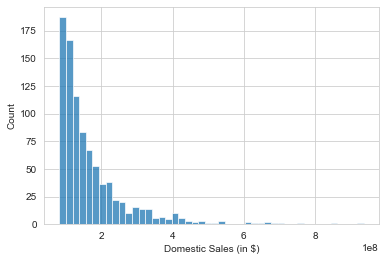

In [ ]:
sns.histplot(data=movie_df, x='Domestic Sales (in $)')
# left skewed, the majority of the data lies in the 1-2 e^8 range.It looks like there are a number of outliers in the upper range

<AxesSubplot:>

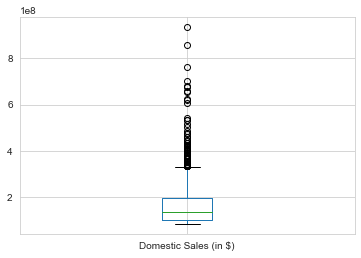

In [ ]:
movie_df.boxplot(column='Domestic Sales (in $)')
#again we see the dots signify quite a number of outliers


In another situation one might want to remove or normalize the outliers. In this case I opted not to remove the outliers because we are interested in the characteristics of the top 10. We specifically want to investigate what makes those top movies perform exceptionally.

There are 3 columns accounting for sales. Domestic, International and world sales. Next I will look at the relationship between the three.

In [ ]:
revenue = movie_df[["Domestic Sales (in $)", "International Sales (in $)", "World Sales (in $)"]]

<AxesSubplot:>

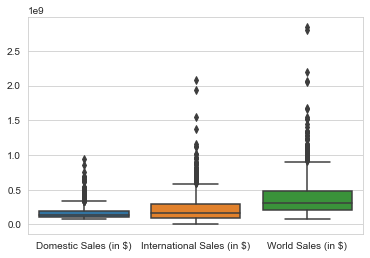

In [ ]:
sns.boxplot(data=revenue)  # create a  box plot for each category of sales

The three Sales categories all have significant outliers

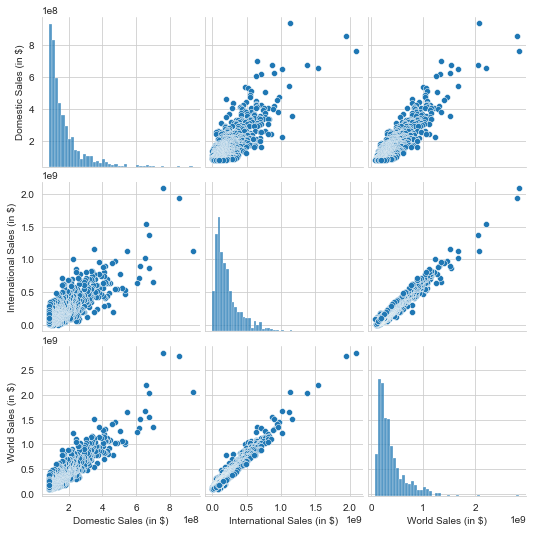

In [ ]:
sns.pairplot(movie_df[["Domestic Sales (in $)", "International Sales (in $)", "World Sales (in $)"]]) #plot these 3 columns against each other

We see that there is a fairly linear relationship between Domestic, International and World Sales. Therefore, we can just analyse one and make some general comments wrt sales.

In [ ]:
corr = df[['Domestic Sales (in $)', 'International Sales (in $)', 'World Sales (in $)']].corr() #find the correlation between these values
corr

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
Domestic Sales (in $),1.000000,0.795565,0.903561
International Sales (in $),0.795565,1.000000,0.976868
World Sales (in $),0.903561,0.976868,1.000000


The observation of the linear relationship between the sales categories is confirmed by observing the correlation. There is strong positive correlation between the three categories of Sales

Next we investigate the relationship between distributor and Domestic Sales

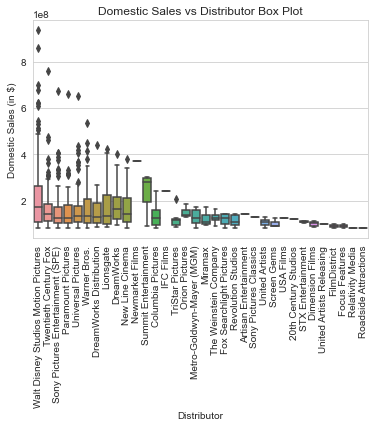

In [ ]:
# Create a box plot of revenue for each distributor. Scatter plot was too jumbled
sns.boxplot(x='Distributor', y='Domestic Sales (in $)', data=movie_df)

plt.xticks(rotation=90)  # Rotate the x-axis labels to be vertical

# Add labels and title to the plot
plt.xlabel('Distributor')
plt.ylabel('Domestic Sales (in $)')
plt.title('Domestic Sales vs Distributor Box Plot')

plt.show()  # Show the plot

Walt Disney Studios produced many of the highest performing films. However looking at the plot for Summit Entertainment. It's releases are consistently better performing than the bulk of Walt Disney's films

In [ ]:
# filter by distributor and sort by box office
top_summit_films = df[df['Distributor'] == 'Summit Entertainment'].sort_values('Domestic Sales (in $)', ascending=False)

top_summit_films.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,cluster
89,89,The Twilight Saga: Eclipse (2010),As a string of mysterious killings grips Seatt...,Summit Entertainment,"June 30, 2010",300531751,397959596,698491347,Action|Adventure|Drama|Fantasy|Romance|Thriller,2 hr 4 min,PG-13,3
90,90,The Twilight Saga: New Moon (2009),Edward leaves Bella after an attack that nearl...,Summit Entertainment,"November 18, 2009",297816253,413209228,711025481,Adventure|Drama|Fantasy|Romance,2 hr 10 min,PG-13,3
105,105,The Twilight Saga: Breaking Dawn - Part 1 (2011),The Quileutes close in on expecting parents Ed...,Summit Entertainment,"November 16, 2011",281287133,430918723,712205856,Adventure|Drama|Fantasy|Romance|Thriller,1 hr 57 min,PG-13,3
225,225,Twilight (2008),When Bella Swan moves to a small town in the P...,Summit Entertainment,"November 20, 2008",193962473,214467942,408430415,Drama|Fantasy|Romance,2 hr 2 min,PG-13,3
803,803,RED (2010),When his peaceful life is threatened by a high...,Summit Entertainment,"October 14, 2010",90380162,108626225,199006387,Action|Comedy|Crime|Thriller,1 hr 51 min,PG-13,3


There were only 5 films by Summit Entertainment in the df.
All were PG-13, runtime was approximately 2hrs. 4 were Drama, 4 Fantasy, 4 Romance, 3 Thriller, and 3 were Adventure.


### Exploring Relationship between license and revenue

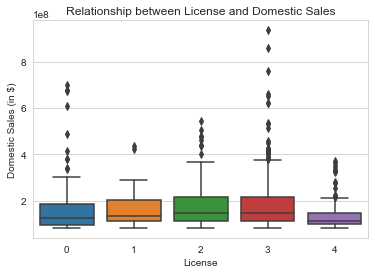

In [ ]:
# Create a box plot of Domestic Sales for each category of License
sns.boxplot(x='License', y='Domestic Sales (in $)', data=movie_df)
plt.xlabel('License')
plt.ylabel('Domestic Sales (in $)')
plt.title('Relationship between License and Domestic Sales')
plt.show()

We see that overall, with the exception of category 4(R-rated) the bulk of the sales are similar. Category 3 (PG-13) has the most positive outliers

In [ ]:
# Calculate the average revenue for each category of License
avg_revenue = df.groupby('License')['Domestic Sales (in $)'].mean()
avg_revenue

Average Domestic Sales for each category of License:


License
G        1.865048e+08
PG       1.806711e+08
PG-13    1.873308e+08
R        1.312289e+08
Name: Domestic Sales (in $), dtype: float64

The average domestic sales for G and PG-13 are particularly similar with PG sales close behind. But certainly, on average, R rated movies make less money.

### Inclusion of Additional Data


The additional dataset was sourced on Kaggle.com. I believe it is useful as it also includes actors, directors and box office revenue. This can be used to examine the relationship between certain actors/ directors and revenue.


In [ ]:
# Reading in the Additional CSV to df_added
df_added = pd.read_csv("C:/Users\kirst\OneDrive\Desktop\)\Semester 2 Courses\COMP 6940 Big Data and Visual Analytics/IMDB Top 250 Movies.csv")
df_added.head()

In [ ]:
df_added.info()

We see that this data set has no missing data.


Just to explore the additional data a bit more, we look at the most common genre combinations below.

In [ ]:
genre_counts = df_added['genre'].value_counts()

# The Top 10 most common genres
display(genre_counts.head(10))

In [ ]:
from numpy import add
plt.figure(figsize=(10,6),dpi=50)
df_added.groupby('directors').size().sort_values(ascending=False).head(10).plot(kind = 'bar', color = sns.color_palette('Set2'))
plt.xlabel("Directors Name")
plt.ylabel("Number of Movies")
plt.title("Top 10 directors")
plt.show()

In [ ]:
print(df_added['box_office'].dtypes)

I attempted to convert the box_office values to numerical but encountered a few road blocks. Such as some rows having the value 'Not Available' and some having a number with the word 'estimated' in brackets.

I opted to replace all not available with 0

In [ ]:
# Replace 'Not Available' values with 0 in the 'box_office' column
df_added['box_office'] = df_added['box_office'].replace('Not Available', 0)

#removes anything non-numeric that is not a digit or a period
df_added['box_office'] = df_added['box_office'].str.replace(r'\D+', '').astype(float)

# Convert box office to numerical datatype
df_added['box_office'] = df_added['box_office'].astype(float)

print(df_added['box_office'].dtypes)

In [ ]:
# Group the data by director and calculate the total revenue generated
director_revenue = df_added.groupby('directors')['box_office'].sum()

# Sort the data in descending order based on the total revenue generated
director_revenue = director_revenue.sort_values(ascending=False)

# Select the top 10 directors with the highest total revenue
top_directors = director_revenue[:10]

top_directors

In [ ]:

# Create the bar chart
plt.bar(top_directors.index, top_directors.values)

# Set the x-axis tick labels and rotate them vertically
plt.xticks(rotation=90)
plt.gca().set_xticklabels(top_directors.index)

# Set the title and axis labels
plt.title('Top 10 Directors by Total Revenue')
plt.xlabel('Director')
plt.ylabel('Total Box Office Revenue')

# Display the chart
plt.show()

# Inferences & Recommendations

Below we see the top 10 highest earning films (Domestic Sales)

In [ ]:
#movie_df.nlargest(n=10,columns='')
movie_df.nlargest(n=10, columns= 'Domestic Sales (in $)')

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),License,Runtime in Mins,Genre Encoded
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,3,138.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,3,181.0,"[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,3,162.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,0,134.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,0,149.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,5,Spider-Man: No Way Home (2021),"With Spider-Man's identity now revealed, Peter...",Sony Pictures Entertainment (SPE),NaT,675813257,868642706,1544455963,0,148.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
6,6,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,3,194.0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
7,7,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,3,124.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,8,The Avengers (2012),Earth's mightiest heroes must come together an...,Walt Disney Studios Motion Pictures,2012-04-25,623357910,895457605,1518815515,3,143.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,9,Star Wars: Episode VIII - The Last Jedi (2017),The Star Wars saga continues as new heroes and...,Walt Disney Studios Motion Pictures,2017-12-13,620181382,712517448,1332698830,3,152.0,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


Note that of the highest grossing films, provided there is a value in the rating column, they were rated G (license 3)
The most common genre is a combination of Action, Adventure and Sci-Fi
Of the top 10, 6 were distributed by Walt Disney Studios Motion Pictures

As an additional consideration, given that we saw that Disney had alot of outliers we also make note of the top grossing films from Summit Entertainment.
There were only 5 films by Summit Entertainment in the dataframe. All were PG-13, runtime was approximately 2hrs. 4 were Drama, 4 Fantasy, 4 Romance, 3 Thriller, and 3 were Adventure.

The average domestic sales for G and PG-13 are similar. PG sales are close behind. But certainly, on average, R rated movies make less money.


From the additional data, we see the top 10 directors by revenue are: Russo, Nolan, Spielberg, Jackson, Watts, Kosinski, Yates, Scorsese, Tarantino & Phillips.

Based on all observations and investigations, I would recommend the studio to produce G rated movies with a genre combination of Action, Adventure and Sci-Fi. Alternatively a combination of Drama, Fantasy, Romance, Thriller and Adventure could also be very profitable. While PG-13 movies generally are similarly profitable to G rated movies, the studio should avoid R rated movies. If possible, the studio can hire one of the directors listed in the previous cell as, films they produced have the highest revenue. 